In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits

<h1>Is this $\tau=1$ or $\tau=0.1$?</h1>

In [2]:
cube1 = fits.open("0_lwsynth_525.0.fits")[0].data

In [3]:
cube2 = fits.open("150_lwsynth_525.0.fits")[0].data

In [4]:
import pyflct

In [5]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [6]:
image1 = cube1[:,:,0,40]
image2 = cube2[:,:,0,40]

In [7]:
vel_x40, vel_y40, vm40 = pyflct.flct(image1, image2, delta_t, pixelsize, sigma, quiet = True)

In [8]:
Vx = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [9]:
# 2x2 Binning of Velocities
Vx_1 = Vx[0]
Vx_2 = Vx[1]

Vy_1 = Vy[0]
Vy_2 = Vy[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [10]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

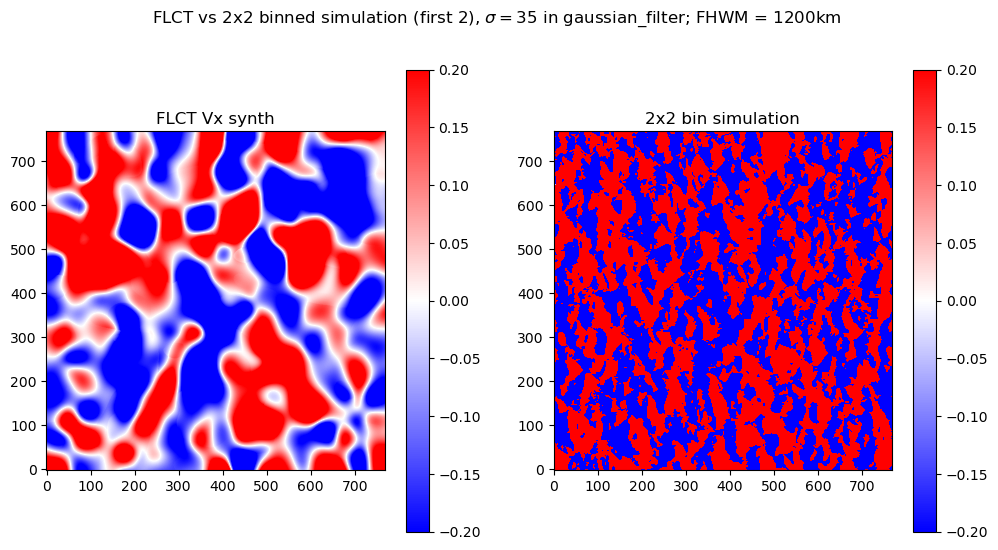

In [11]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [12]:
from scipy.ndimage import gaussian_filter

In [13]:
# sigma = 35
Vx_filtered35 = gaussian_filter(Vx_bin, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_bin, 35, mode = "wrap")

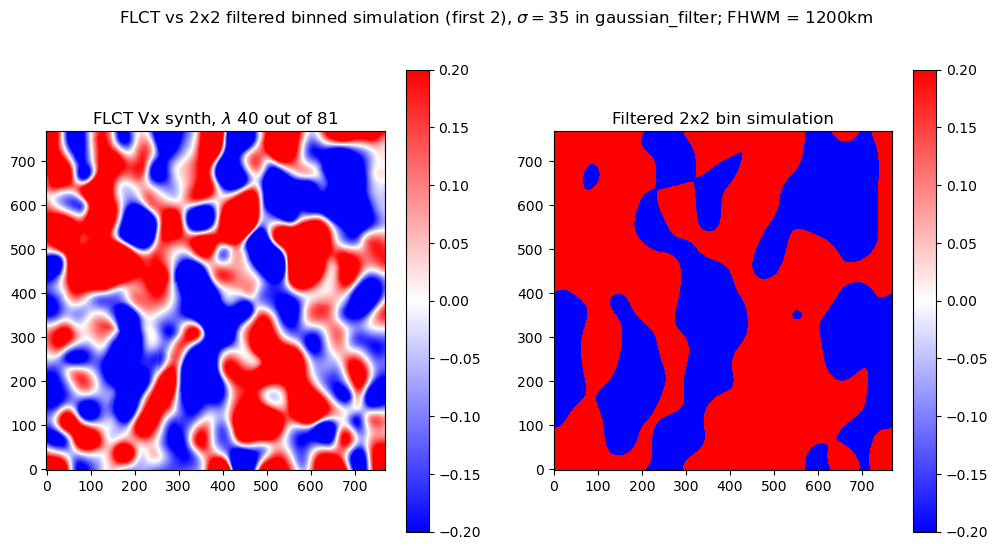

In [14]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("New40_TAU_0_1Vx.png", dpi = 600)

<h1>THIS IS $\tau=0.1$!!!!!</h1>

<h1 style = "color:yellow">$\tau=1$!</h1>

In [17]:
Vx_TAU1 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_TAU1 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_TAU1 = Vx_TAU1.transpose(0, 2, 1)
Vy_TAU1 = Vy_TAU1.transpose(0, 2, 1)

In [18]:
# 2x2 Binning of Velocities
Vx_1TAU1 = Vx_TAU1[0]
Vx_2TAU1 = Vx_TAU1[1]

Vy_1TAU1 = Vy_TAU1[0]
Vy_2TAU1 = Vy_TAU1[1]

Vx_1TAU1 = Vx_1TAU1.reshape(768, 2, 768, 2)
Vx_2TAU1 = Vx_2TAU1.reshape(768, 2, 768, 2)
Vy_1TAU1 = Vy_1TAU1.reshape(768, 2, 768, 2)
Vy_2TAU1 = Vy_2TAU1.reshape(768, 2, 768, 2)

In [19]:
Vx_binTAU1 = (Vx_1TAU1 + Vx_2TAU1).mean(axis = 3).mean(axis = 1)
Vy_binTAU1 = (Vy_1TAU1 + Vy_2TAU1).mean(axis = 3).mean(axis = 1)

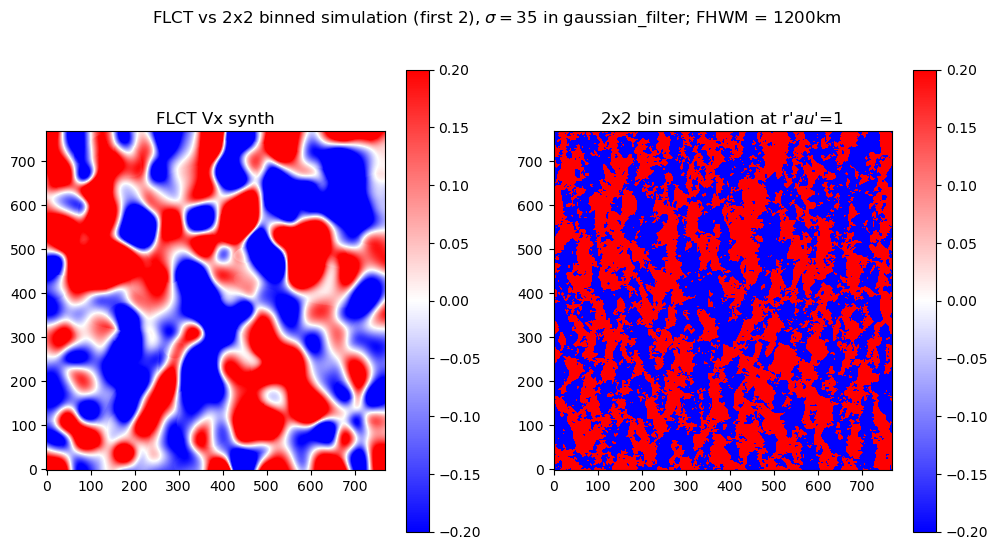

In [30]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_binTAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation at tau = 1") 
fig.colorbar(im2)

In [21]:
# sigma = 35
Vx_filtered35TAU1 = gaussian_filter(Vx_binTAU1, 35, mode = "wrap")
Vy_filtered35TAU1 = gaussian_filter(Vy_binTAU1, 35, mode = "wrap")

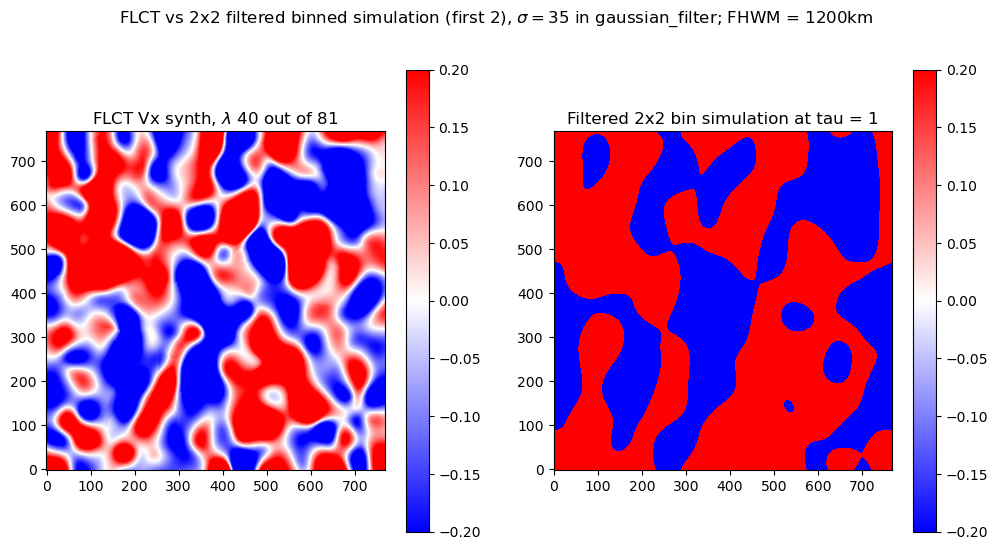

In [31]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New40_TAU_1_0Vx.png", dpi = 600)

In [32]:
from scipy.stats import pearsonr

In [33]:
r_x40TAU1 = pearsonr(vel_x40.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x40TAU1)

PearsonRResult(statistic=0.7252834374030187, pvalue=0.0)


In [34]:
r_y40TAU1 = pearsonr(vel_y40.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y40TAU1)

PearsonRResult(statistic=0.6488545626315068, pvalue=0.0)


<h1> Let's see $\tau=1$ vs continuum</h1>

In [44]:
image3 = cube1[:,:,0,0]
image4 = cube2[:,:,0,0]

In [45]:
vel_x0, vel_y0, vm0 = pyflct.flct(image3, image4, delta_t, pixelsize, sigma, quiet = True)

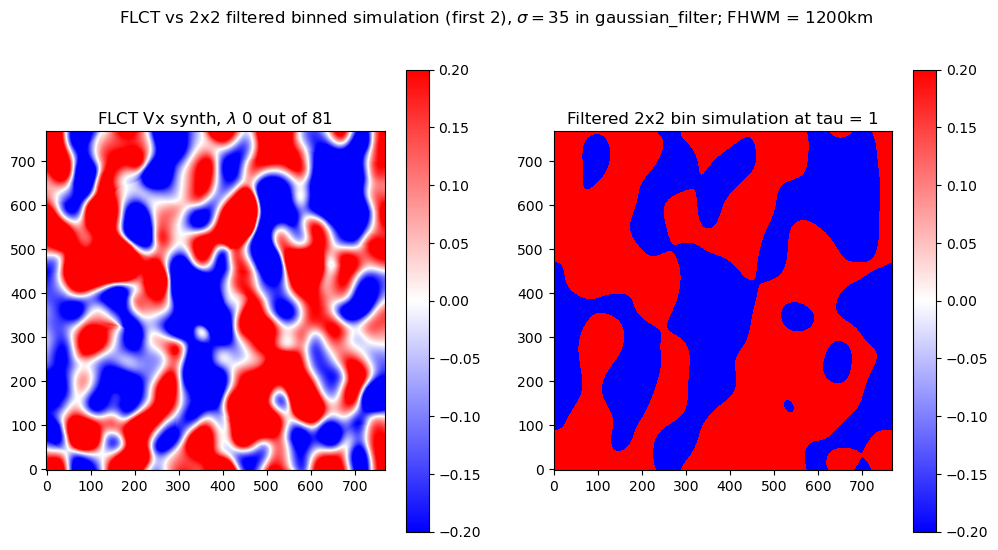

In [46]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 0 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New00_TAU_1_0Vx.png", dpi = 600)

In [47]:
r_x0TAU1 = pearsonr(vel_x0.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x0TAU1)

PearsonRResult(statistic=0.8111617498504096, pvalue=0.0)


In [48]:
r_y0TAU1 = pearsonr(vel_y0.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_y0TAU1)

PearsonRResult(statistic=-0.11881511538082187, pvalue=0.0)


<h1>Let's see $\tau=1$ vs line</h1>

In [49]:
image5 = cube1[:,:,0,45]
image6 = cube2[:,:,0,45]

In [50]:
vel_x45, vel_y45, vm45 = pyflct.flct(image5, image6, delta_t, pixelsize, sigma, quiet = True)

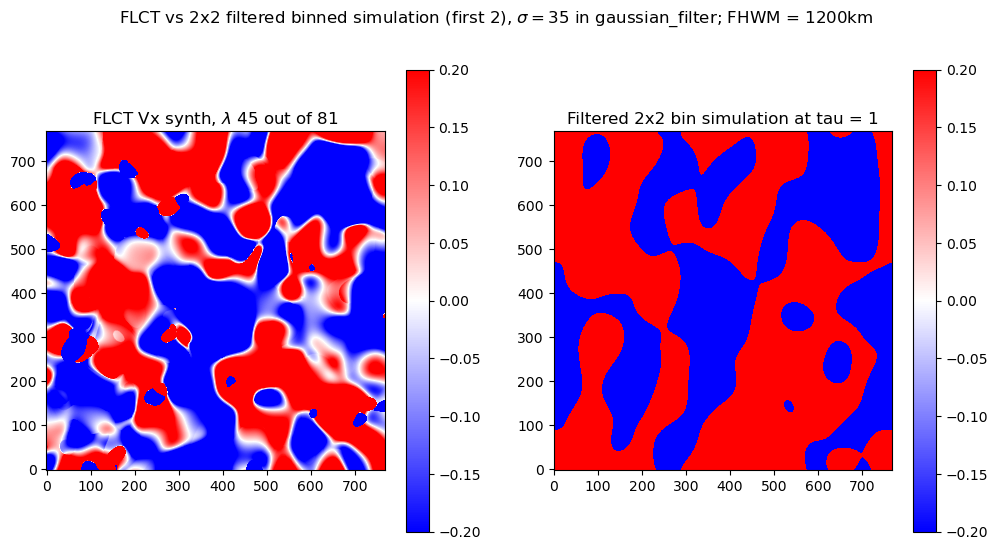

In [51]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x45[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 45 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New45_TAU_1_0Vx.png", dpi = 600)

In [52]:
r_x45TAU1 = pearsonr(vel_x45.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x45TAU1)

PearsonRResult(statistic=0.07194116124656719, pvalue=0.0)


In [53]:
r_y45TAU1 = pearsonr(vel_y45.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y45TAU1)

PearsonRResult(statistic=0.1660091976532814, pvalue=0.0)


In [54]:
image7 = cube1[:,:,0,50]
image8 = cube2[:,:,0,50]

In [55]:
vel_x50, vel_y50, vm50 = pyflct.flct(image7, image8, delta_t, pixelsize, sigma, quiet = True)

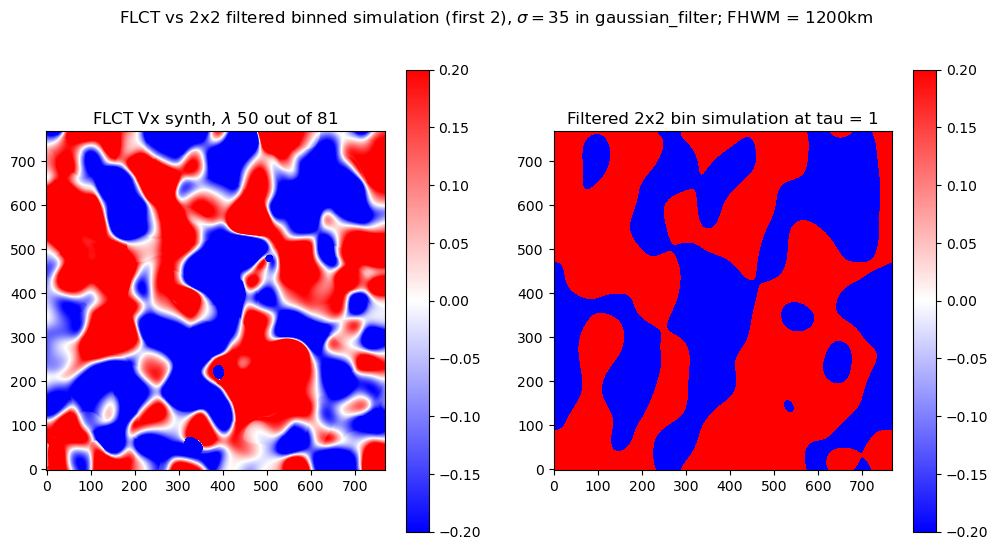

In [56]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x50[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 50 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New50_TAU_1_0Vx.png", dpi = 600)

In [57]:
r_x50TAU1 = pearsonr(vel_x50.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x50TAU1)

PearsonRResult(statistic=0.2704325567298054, pvalue=0.0)


In [58]:
r_y50TAU1 = pearsonr(vel_y50.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y50TAU1)

PearsonRResult(statistic=0.15462236658933287, pvalue=0.0)
